# 准备工作

- 一般工具都采用全局安装，运行模块采用局部本地项目安装；

## 安装poi

- `sudo npm install -g poi --unsafe-perm`
    - `--unsafe-perm`是防止安装的时候切换nobody用户身份。

- 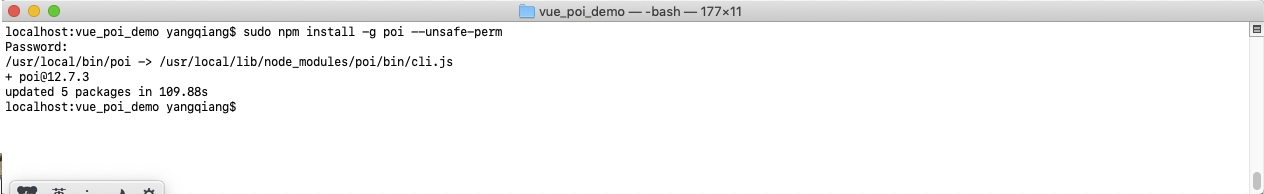

## 安装create-poi-app

- `sudo npm install create-poi-app -g --unsafe-perm`

- 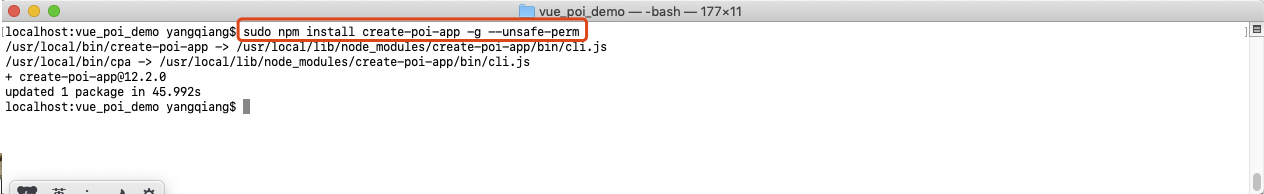

# 创建项目

## 使用create-poi-app创建项目

- `create-poi-app vue_poi_demo`
    - 命令create-poi-app 是poi项目创建工具，命令选项直接指定需要创建的项目名。
    - 创建过程中，需要做一些选择，我选择的是（空格选择，up/down方向键选择菜单项，回车确认）：
        - Type Checker：类型检测
        - Linter：格式与语法规范检测
        - PWA（Progressive Web App）：启用 PWA 插件时注入 manifest/icon 链接；
    - 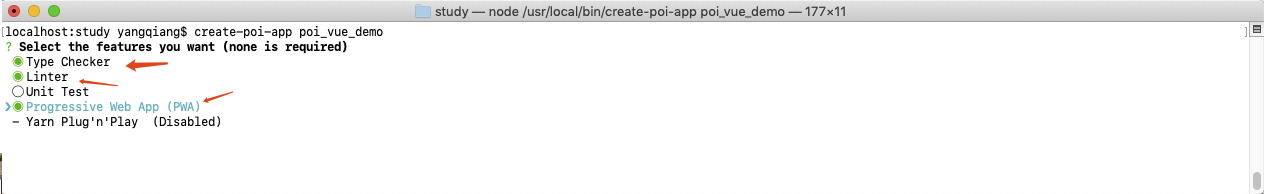

- 接下来就是选择TypeChecker类型
    - 只有TypeScript（Flow还没有实现）

- Linter选择TSLint（up/down方向键选择值）
    - 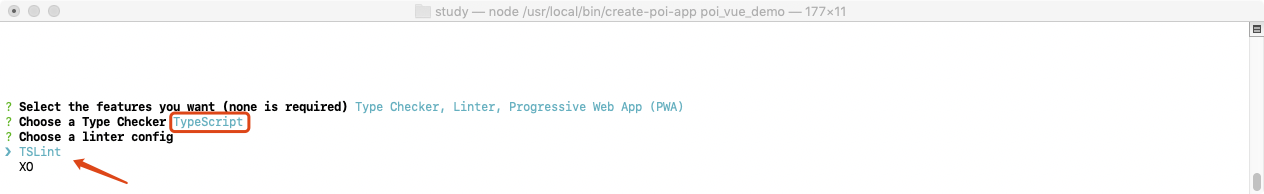

- 设置完成会自动安装相关node_modules模块
    - 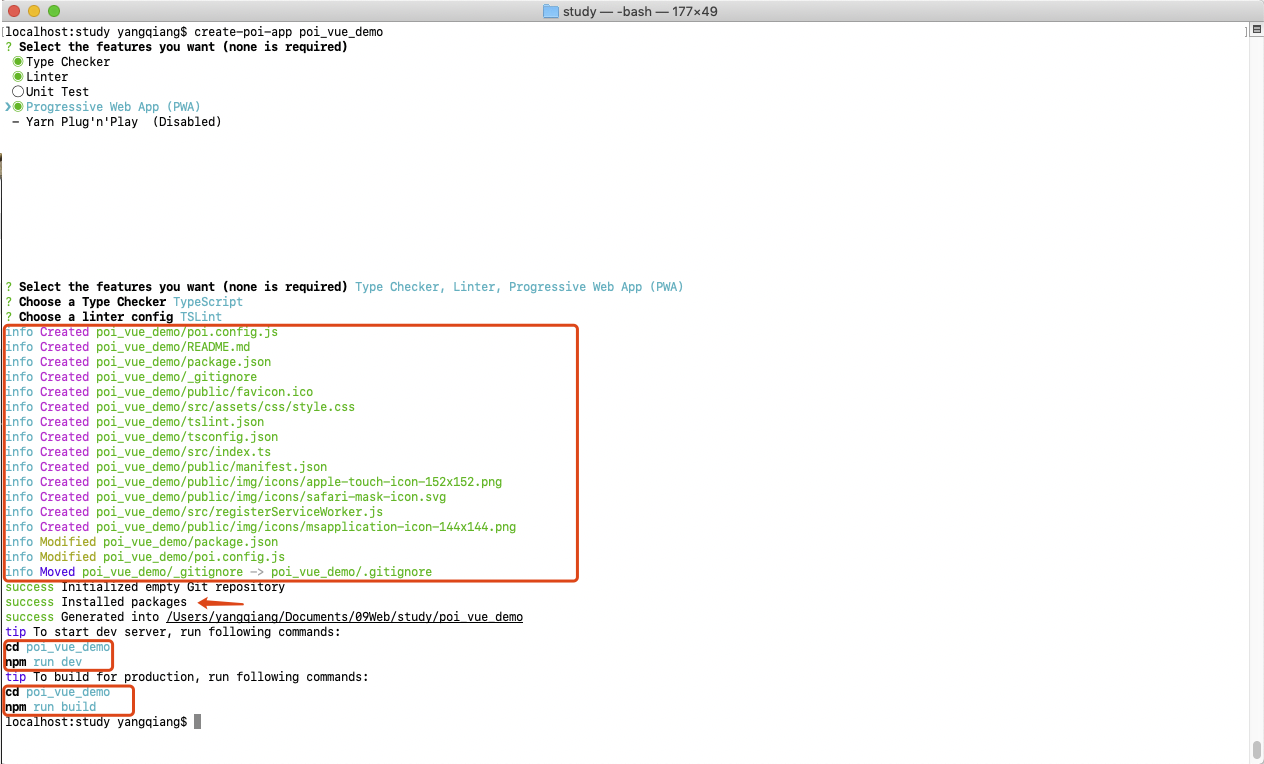

## 项目目录结构

1. 目录结构
    - 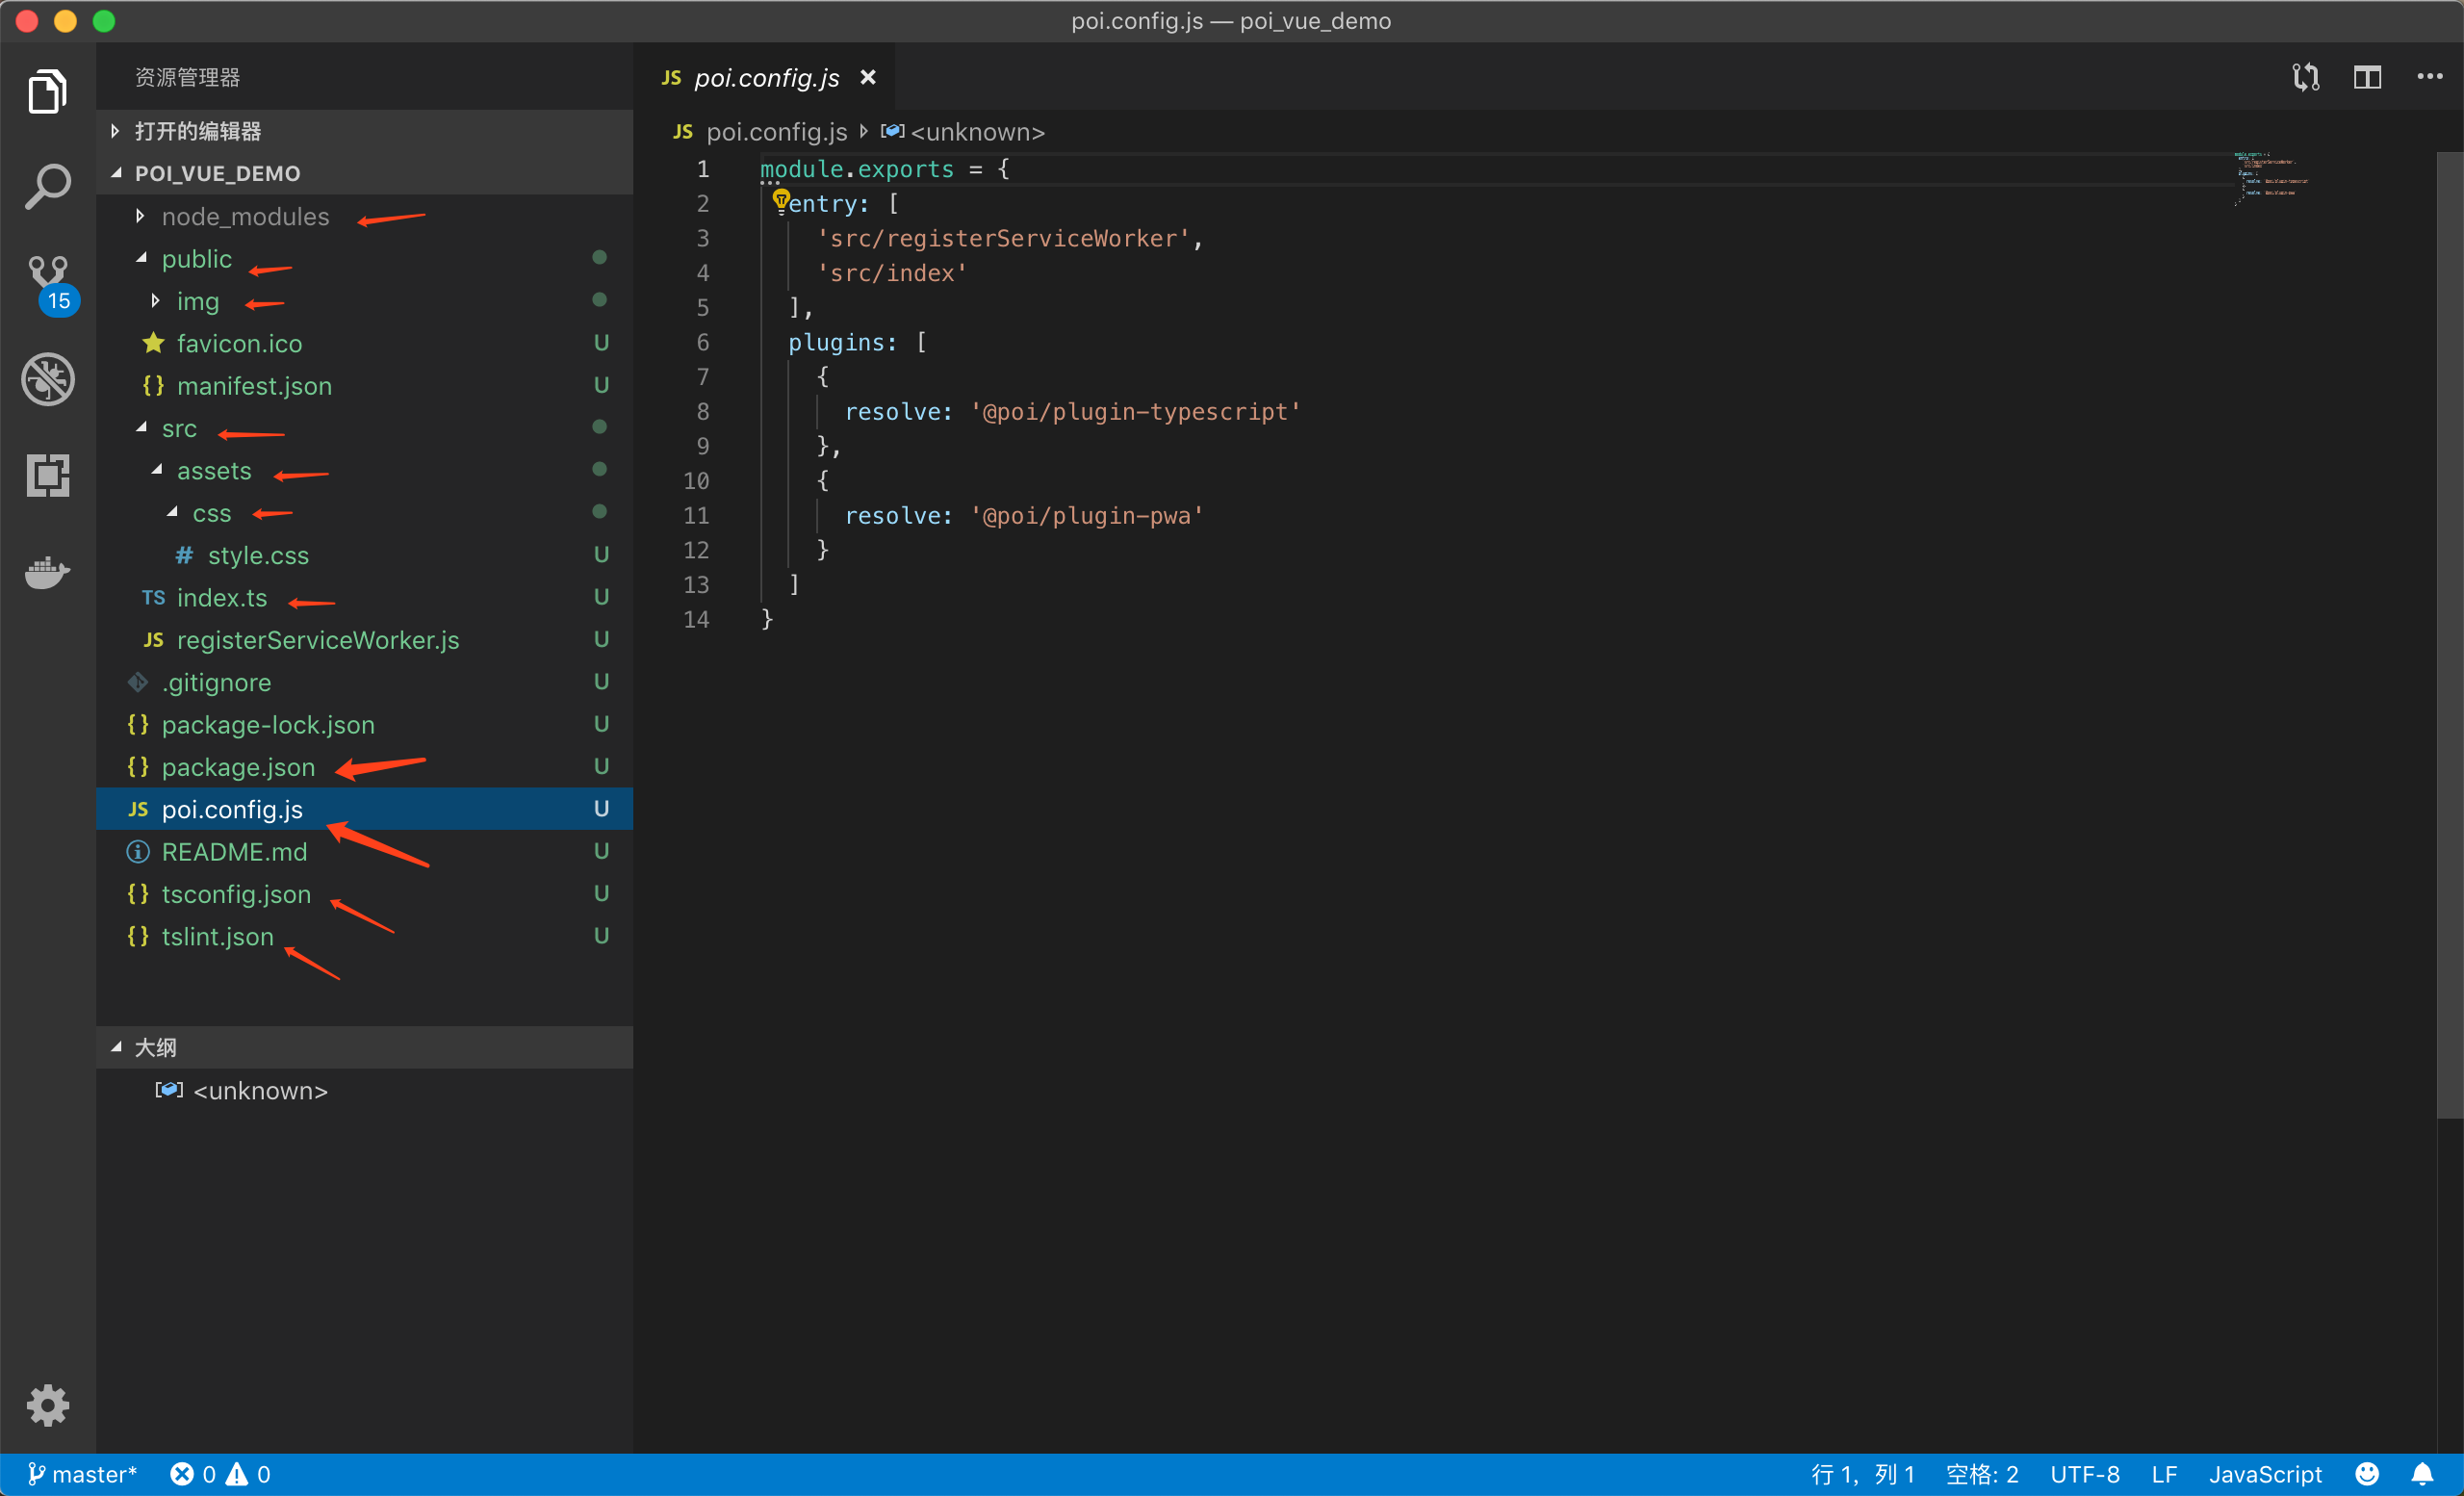

2. 目录结构说明
    - node_modules: 安装到本地的模块
    - public：需要打包的公开发布的静态资源
    - src：需要打包的用户开发的源代码（主要包含js，vue，css，字库，图像等）
    - 配置文件：
        1. package.json：npm的运行环境配置
            - dev
            - build
        2. poi.config.js：poi的核心配置
        3. tsconfig.json：typescript插件配置
        4. tslint.json：语法与格式配置

## 运行与构建项目

- 构建与运行项目，可以查看package.json
    - 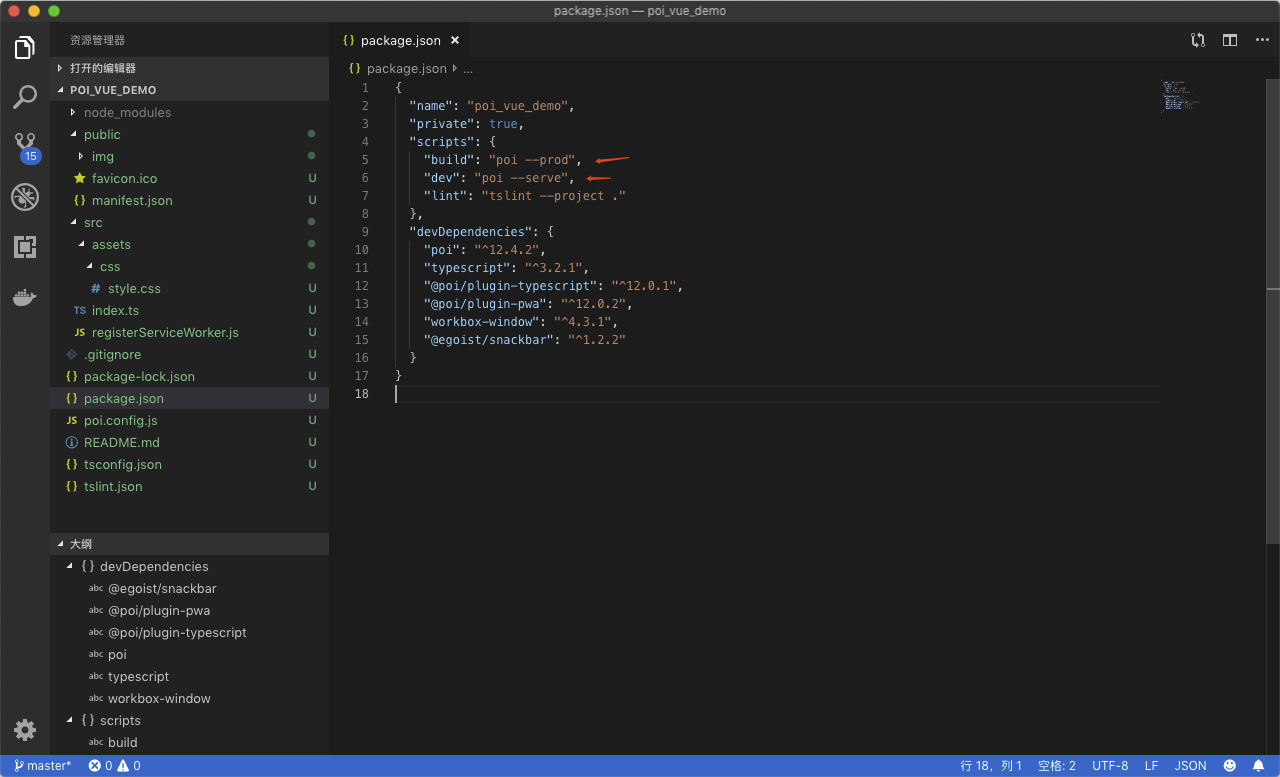

### 构建

- `npm run build`
- 启动一个HTTP服务，使用浏览器访问。

### 运行项目

- `npm run dev`

- 构建完成产生浏览器可运行的静态文件（在dist目录下）

# Vue页面结构

- poi默认支持vue模块化加载器vue-loader，就是说基本上是0配置。

## 主页容器模板

- 在public目录下添加index.html主页容器模板
    - 默认没有，产生一个默认的index.html，如果在public存在index.html就是用用户的作为模板。
    
    ```HTML
    <!DOCTYPE html>
    <html>
      <head>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">
        <title></title>
      </head>
      <body>
        <div id="app">{{data1}}</div>
      </body>
    </html>

```

- 说明：
    - 上面的`<div id=app>`会被Vue动态渲染为路由器容器；

## 路由容器模板

- 添加这个模块，主要是为Vue-router提供工作区切换的需要。
    - 这么文件是有套路的：三大块template/javascript/style。
    
    
```HTML

    <template>
      <div>
        <h1>首页:{{data1}}</h1>
        <router-view></router-view>
      </div>

    </template>

    <script>

    export default {
      name: 'app',
      components: {
      },
      data(): function {
        return  {
          data1: '数据',
        };
      },
    };

    </script>
    <style>
    </style>

```

## 内容页面

- 上面的都是套路，这个部分是程序员需要关注的设计、业务与逻辑实现的主要文件。
    - 这里我们使用了jQuery，主要用来说明其他第三方js模块的引入与使用，采用了webpack内置的全局处理插件ProvidePlugin。

```HTML

<template>
  <div>
    <h1 id="tl">工作区</h1>
  </div>
</template>
<script>
$(
    () => {
        $('#tl').css('border', '3px solid red');
        $('#tl').click(
            () => {
                alert('Hello');
            },
        );
    },
  );
</script>
<style>
</style>


```

## 修改入口文件

- 在src下构建，默认提供的是index.ts，如果使用VSCode工具，处于语法检测的目的，可以把扩展名修改为js
- 完整的文件如下：
    - 其中所有路由url都单独封装在一个js文件中routes.js，可以直接在入口文件使用也是一样，如果项目太大，则容易使入口文件过于繁琐庞大。
    
- 提示：
    - poi要求遵循ES6的新语法规则，比如建议使用箭头函数，不建议使用function定义函数。
    
```javascript
import index from './pages/index.vue';

var routes = [
    {
        path: '/',
        component: index
    },
];
export {routes}

```

```javascript
    import Vue from 'vue';
    import VueRouter from 'vue-router';
    import App from './App.vue';
    import {routes} from './routes.js';
    import $ from  'jquery';

    Vue.use(VueRouter);

    var router = new VueRouter(
      {
        mode:"hash",
        base: __dirname,
        routes: routes,
      }
    );

    var vm = new Vue({
      el: '#app',
      router,
      render: (h) => h(App),
    });

```

### 路由数组文件

- 定义的routes变量导出，在index.js中使用；


``` javascript
import index from './pages/index.vue';

var routes = [
    {
        path: '/',
        component: index
    },
];
export {routes}

```


### 创建Vue对象并绑定到主页容器的挂载点

```javascript
    import Vue from 'vue';
    .....
    import App from './App.vue';
    ....



    var vm = new Vue({
      el: '#app',
      render: (h) => h(App),
    });

```

### 构建路由对象

```javascript

import VueRouter from 'vue-router';
import {routes} from './routes.js';


Vue.use(VueRouter);

var router = new VueRouter(
  {
    mode:"hash",
    base: __dirname,
    routes: routes,
  }
);
```

### 挂载路由对象到Vue

- 只有挂载路由对象到Vue才能使用`<router-view>`内置组件：打包翻译才能被vue-loader识别。

```javascript

import Vue from 'vue';
import VueRouter from 'vue-router';
import App from './App.vue';
import {routes} from './routes.js';

Vue.use(VueRouter);

var router = new VueRouter(
  {
    mode:"hash",
    base: __dirname,
    routes: routes,
  }
);

var vm = new Vue({
  el: '#app',
  router,                             // 挂载路由对象到vue对象。
  render: (h) => h(App),
});

```

# webpack.ProvidePlugin插件与jQuery

- 使用jQuery比较简单，在webpack中需要配置，在poi的配置也需要配置webpack。如下几步：
    1. 安装jQuery（可以直接使用jQuery.js文件，因为语法的标准化与趋势，简易不再使用传统js文件，而是使用module模块化的封装js文件）
    2. 代码中正常使用jQuery
    3. 为了在index.js引入jQuery，并在所以模块中能使用，需要配置下全局化。
        - 使用webpack的ProvidPlugin插件；
        - 在poi.config.js中配置webpack的配置；
            - webpack的配置可以参考webpack的相关文档，我们前面的内容有专门的介绍。

```javascript

    var webpack = require("webpack");

    module.exports = {
      entry: 'src/index',
      plugins: [
        {
          resolve: '@poi/plugin-typescript'
        },
      ],
      ////////////////////////////webpack配置
      configureWebpack: {
        plugins: [
          new webpack.ProvidePlugin({
            $: 'jquery',
           }),
        ]
      }
      /////////////////////////////////////////
    }
    

```

---- 

# 附录

- 其他需要处理的包含网页中的资源：
    - css及其相关的样式资源（包含less，sass等）
    - 图像资源（包含base64压缩编码，文件名hash处理等）
    - html模板（pug，ejs等）
    - 资源抽取（把css，jpg等单独抽取为文件，并单独hash编码）；
    - 与react框架融合；

- 更多的poi与create-poi-app工具使用，使用在线帮助即可。

----